# 로지스틱 회귀(Logistic Regression)

* 선형 회귀 방식을 분류에 적용한 알고리즘입니다. (특히, 이진분류)
* 즉, 로지스틱 회귀는 **분류**에 사용됩니다. 
* "S"자 모양의 곡선으로 계산하는 시그모이드 함수(Sigmoid Function)을 사용해서, 분류하는 모델입니다.
* 로지스틱 회귀는 정확히 0 또는 1을 예측하는 대신, 확률(0과1사이의 값)을 생성해서 0과 1을 분류하는 예측 모델
* 로지스틱 회귀에서 예측은 **예측 확률**을 의미합니다. 
* 예측 확률이 0.5 이상이면 1로, 0.5 이하이면 0으로 예측합니다. 


* 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어납니다. 
* 이때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많습니다. 

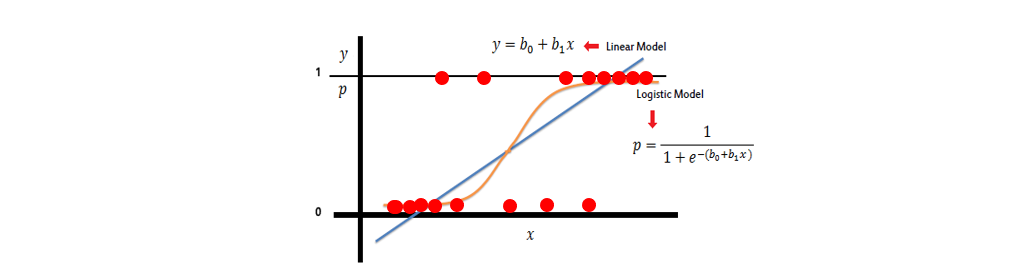

**[참고]**

* 예측을 한다는 것은 선형방정식을 찾는 것입니다. $y=ax + b$ 
* 선형방정식을 찾는다는 것은 기울기 계수인 $a$를 찾는 것입니다. 
* 입력데이터 $x$는 실수 전체가 대상이고, 출력 $y$ 또한 실수 전체가 대상이 됩니다. 
* 그런데 분류에서 우리가 원하는 것은
* 출력이 0 또는 1로 나오는 형태여야 한다는 것이다. 
* 입력이 어떤 값이 들어가더라도 출력 $y$가 0 또는 1 사이의 값만 존재하도록 만들어야 하는데.....
* 이렇게 만들 수 있는 함수가 어디없을까? 하고 수학자,통계학자 등등이 찾아보니
* 시그모이드 함수가 그런 특성을 가지고 있는게 아닌가...
* 로지스틱회귀 클래스에는 시그모이드 함수가 코드로 구현되어 있습니다. 

**[사이킷런 클래스]**

* LogisticRegression()클래스를 지원합니다. 
* 주요 하이퍼파라미터
    * **penalty**: 규제(Regularization)를 의미합니다. l1, l2(기본) 
    * **C**: 규제강도를 조절하는 alpha값의 역수, $C=1/alpha$ C값이 작을수록 규제 강도가 큽니다.


---

## 데이터 로딩

In [ ]:
## 코랩을 사용할 때
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

#위스콘신 유방암 데이터
cancer = load_breast_cancer()

#내장 데이터 셋 데이터프레임으로 만듬
cancerDF = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancerDF['target'] = cancer.target

In [2]:
cancerDF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#데이터 요약정보
cancerDF.info()

In [6]:
#레이블 target안의 class 종류와 해당 개수 확인
cancerDF['target'].value_counts()


1    357
0    212
Name: target, dtype: int64

<AxesSubplot: >

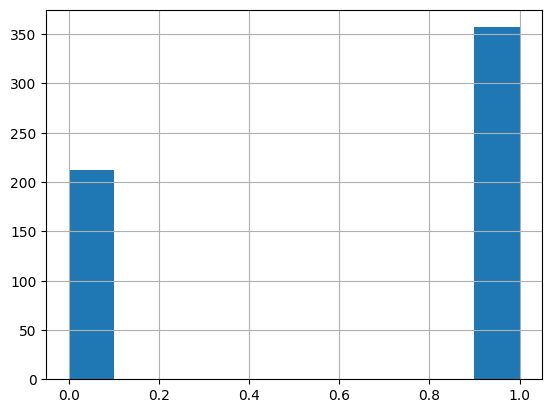

In [7]:
#히스토그램
cancerDF['target'].hist()

In [8]:
#통계정보 확인
cancerDF.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
cancerDF.describe().T #전치행렬

## 데이터 전처리

In [31]:
from sklearn.preprocessing import StandardScaler

#로지스틱회귀의 경우 StandardScaler로 진행해주는 것이 좋다. 
# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(cancer.data)
cancer_scaled = scaler.transform(cancer.data)



In [32]:
# StandardScaler 적용 후 데이터프레임으로 만듬
#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
cancer_scaled_df = pd.DataFrame(data=cancer_scaled, columns=cancer.feature_names)


In [ ]:
cancer_scaled_df.describe().T

In [34]:
cancer_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
#통계 요약 정보
print('feature 들의 평균 값')
print(cancer_scaled_df.mean())
print('\nfeature 들의 분산 값')
print(cancer_scaled_df.var())

## 데이터 세트 준비

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#데이터 분할
X_train , X_test, y_train , y_test = train_test_split(cancer_scaled_df,cancer.target, test_size=0.3, random_state=0)

# X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0,stratify=cancer.target)


In [ ]:
X_train

In [58]:
type(X_train),type(X_test),type(y_train),type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 numpy.ndarray)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


## 모델 학습:로지스틱회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()

# 학습
lr_clf =lr_clf.fit(X_train,y_train)

# 예측
pred = lr_clf.predict(X_test)
pred

#0은 0.5보다 작은 확률, 1은 0.5보다 큰 확률



In [ ]:
lr_clf.predict_proba(X_test) #예측확률
# 1번째 줄을 해석하자면 99%로 0이고, 13%로 1이므로 0이다.

## 평가하기

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))


In [65]:
get_clf_eval(y_test , pred )

오차 행렬
[[ 60   3]
 [  1 107]]
정확도: 0.9766, 정밀도: 0.9727, 재현율: 0.9907, F1:0.9817


> * 정확도가 97.6%로 성능이 좋은 편입니다. 
> * 하지만 좀 더 성능을 높여 봅시다.



 

# 종합코드

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#위스콘신 유방암 데이터
cancer = load_breast_cancer()

#내장 데이터 셋 데이터프레임으로 만듬
cancerDF = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancerDF['target'] = cancer.target

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(cancer.data)
cancer_scaled = scaler.transform(cancer.data)


# StandardScaler 적용 후 데이터프레임으로 만듬
#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
cancer_scaled_df = pd.DataFrame(data=cancer_scaled, columns=cancer.feature_names)

#데이터 분할
X_train , X_test, y_train , y_test = train_test_split(cancer_scaled_df,cancer.target, test_size=0.3, random_state=0)


# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()

# 학습
lr_clf =lr_clf.fit(X_train,y_train)

# 예측
pred = lr_clf.predict(X_test)

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test , pred )






오차 행렬
[[ 60   3]
 [  1 107]]
정확도: 0.9766, 정밀도: 0.9727, 재현율: 0.9907, F1:0.9817


## 하이퍼파라미터 튜닝

In [75]:
from sklearn.model_selection import GridSearchCV

# - 'newton-cg'   -   ['l2', 'none']
# - 'lbfgs'       -   ['l2', 'none']
# - 'liblinear'   -   ['l1', 'l2']
# - 'sag'         -   ['l2', 'none']
# - 'saga'        -   ['elasticnet', 'l1', 'l2', 'none']

params={'solver':['liblinear'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]} #규제 강도: 높은 강도에서 작은 강도로


grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(X_train,y_train)

print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.985


In [76]:
#최적의 파라미터를 가진 분류기
best_clf = grid_clf.best_estimator_

#예측
pred = best_clf.predict(X_test)


#평가
get_clf_eval(y_test,pred)

오차 행렬
[[ 61   2]
 [  1 107]]
정확도: 0.9825, 정밀도: 0.9817, 재현율: 0.9907, F1:0.9862


> * LogisticRegression만 사용했을때는 default 파라미터를 기준으로 학습
> * 그 결과, 정확도는 97.6%로 성능을 보였고,
> * GridSearchCV와 결합하여 하이퍼파라미터 튜닝을 통하면
> * 정확도가 98.2%로 약간의 성능 향상을 볼 수 있습니다.

결론 : 하이퍼파라미터 튜닝을 통해서 약간의 성능향상을 기대해 볼 수 있다.